In [57]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [58]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [59]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [60]:
BR = nc.Dataset('./BR2015_1styr_hovmoller.nc')
PI = nc.Dataset('./PI2015_1styr_hovmoller.nc')

dic_BR = BR['model_output']['dic_hovmol']
ta_BR = BR['model_output']['ta_hovmol']
temp_BR = BR['model_output']['temp_hovmol']
sal_BR = BR['model_output']['sal_hovmol']

dic_PI = PI['model_output']['dic_hovmol']
ta_PI = PI['model_output']['ta_hovmol']
temp_PI = PI['model_output']['temp_hovmol']
sal_PI = PI['model_output']['sal_hovmol']

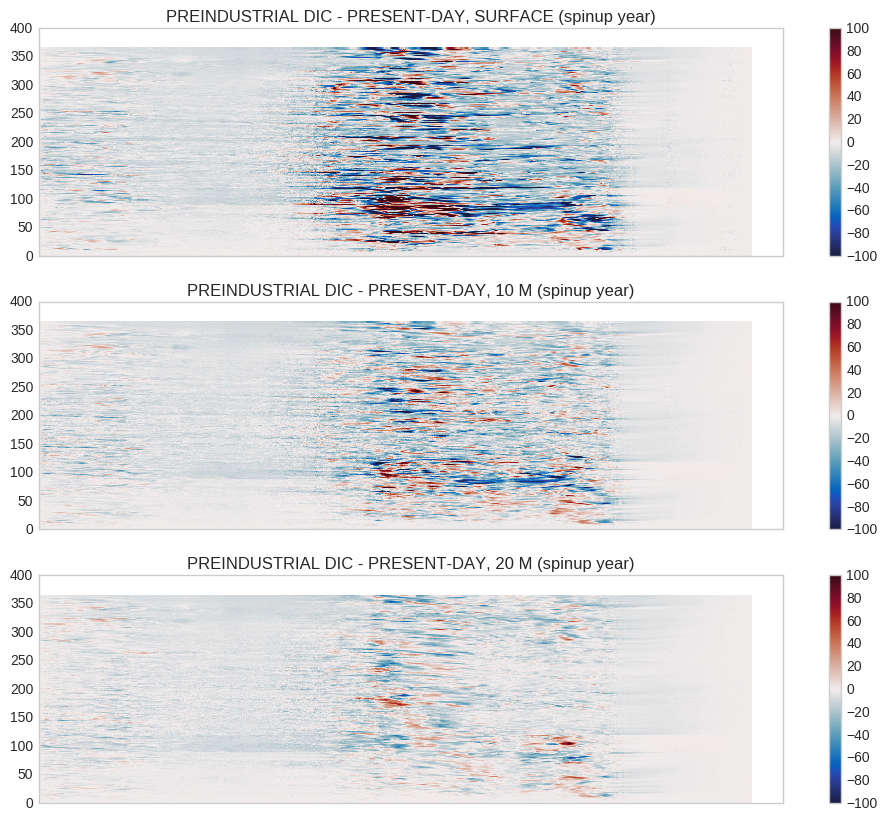

In [61]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,0,:] - dic_BR[:,0,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, SURFACE (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])        

    if i == 2:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,10,:] - dic_BR[:,10,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, 10 M (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])     
        
    if i == 3:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,20,:] - dic_BR[:,20,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, 20 M (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])   

# t_figstring = './FIGS/' + figstring + 'base-spinup.jpg'
# fig.savefig(t_figstring)


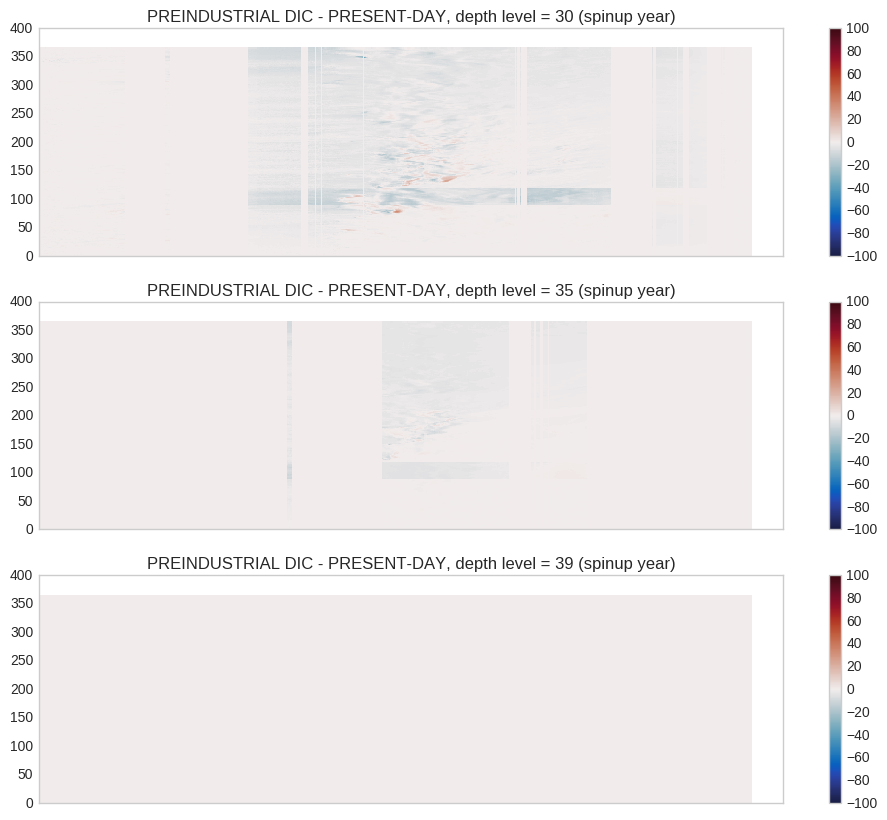

In [62]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,30,:] - dic_BR[:,30,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, depth level = 30 (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])        

    if i == 2:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,35,:] - dic_BR[:,35,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, depth level = 35 (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])     
        
    if i == 3:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_PI[:,39,:] - dic_BR[:,39,:] 
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('PREINDUSTRIAL DIC - PRESENT-DAY, depth level = 39 (spinup year)')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])   

# t_figstring = './FIGS/' + figstring + 'base-spinup.jpg'
# fig.savefig(t_figstring)


In [63]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth[:] = depth_this
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [64]:
np.shape(sal_sens2)
dep = 0
tsal_s = sal_sens2[:,dep,:]
ttemp_s = temp_sens2[:,dep,:]
tdic_s = dic_sens2[:,dep,:]
tta_s = ta_sens2[:,dep,:]


NameError: name 'sal_sens2' is not defined

In [ ]:
pHr_s, OmAr_s, pco2r_s = oned_moxy(tsal_s, ttemp_s, tdic_s, tta_s, 1, 0)